<a href="https://colab.research.google.com/github/murselcr/forecasting-time-series/blob/main/forecasting_arima_proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima.model import ARIMA



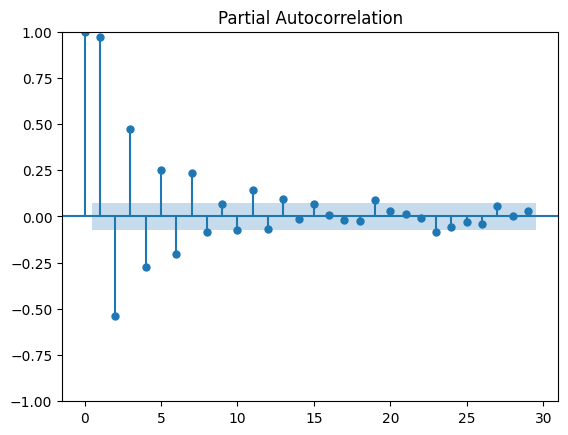

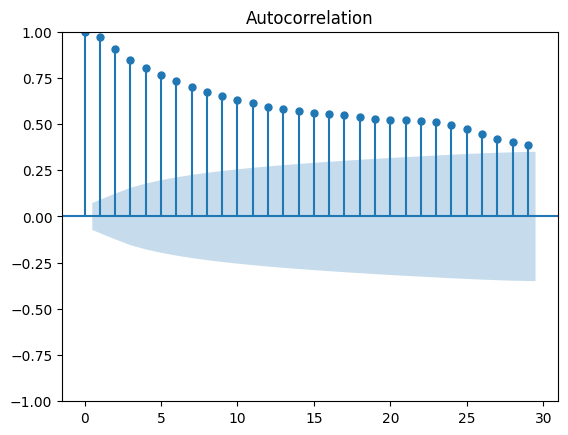

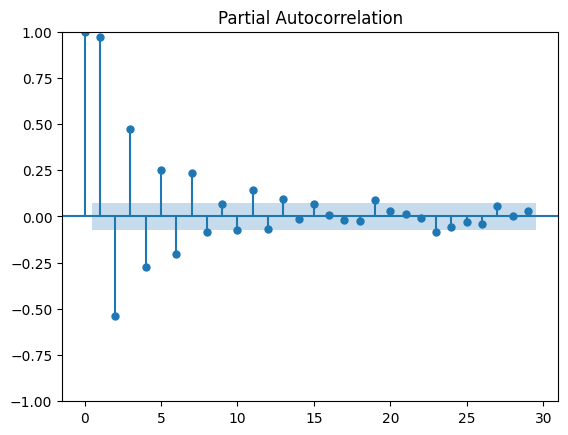

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
dataset = pd.read_excel('eskişehir hava durumu.xlsx', header=0, index_col=0, parse_dates=True)
dataset["ET"] = [float(str(i).replace(",", ".")) for i in dataset["ET"]]

dataset.index = dataset.index.to_period('1h')
plot_acf(dataset)
plot_pacf(dataset)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(dataset)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -2.371401
p-value: 0.149971


In [ ]:
X = dataset.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
print(len(X),len(train),len(test))

720 503 217


In [ ]:
history = [x for x in train]
predictions_arima = list()

In [ ]:
for t in range(len(test)):
  model = ARIMA(history, order=(2,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions_arima.append(yhat)
  history.append(test[t])
  print('predicted=%f, expected=%f' % (yhat, test[t]))

<ipython-input-7-444040d6be58>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, test[t]))


predicted=23.391054, expected=22.940000
predicted=22.010291, expected=21.490000
predicted=21.462921, expected=18.570000
predicted=17.124075, expected=20.250000
predicted=23.091138, expected=21.190000
predicted=21.006001, expected=21.650000
predicted=21.496923, expected=22.380000
predicted=22.689062, expected=23.150000
predicted=23.345046, expected=25.940000
predicted=27.649998, expected=27.330000
predicted=26.894634, expected=30.260000
predicted=31.745148, expected=31.850000
predicted=31.492717, expected=29.940000
predicted=27.637091, expected=25.560000
predicted=23.249765, expected=21.240000
predicted=20.295746, expected=19.650000
predicted=20.750966, expected=18.820000
predicted=19.038490, expected=21.910000
predicted=24.705614, expected=26.630000
predicted=28.570297, expected=25.930000
predicted=22.871506, expected=24.310000
predicted=23.451851, expected=24.340000
predicted=25.229240, expected=28.610000
predicted=31.842964, expected=34.310000
predicted=36.363981, expected=39.080000


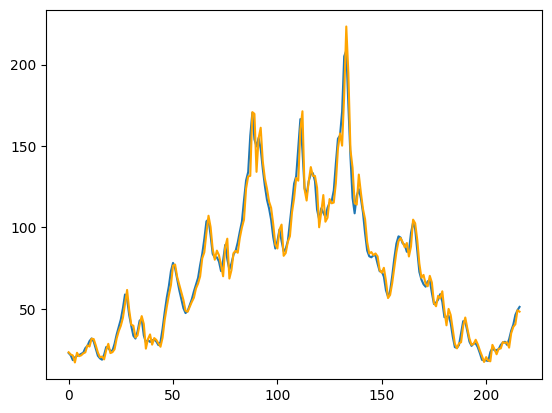

In [ ]:
pyplot.plot(test)
pyplot.plot(predictions_arima, color='orange')
pyplot.show()


In [ ]:
print("mae_arima:", mean_absolute_error(test, predictions_arima))

mae_arima: 4.237761240343306


In [ ]:
print("mse_arima:", mean_squared_error(test, predictions_arima))


mse_arima: 37.3916045785112


In [ ]:

print("mape_arima:", mean_absolute_percentage_error(test, predictions_arima))

mape_arima: 0.06181623107933081
